In [100]:
#imports
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

In [113]:
#Loading both Training.csv and Testing.csv
path = os.getcwd() + "/Training.csv"
data = pd.read_csv(path)
otherpath = path = os.getcwd() + "/Testing.csv"
extradata = pd.read_csv(otherpath)
#Both datasets needed to be combined into one pandas dataframe 
comp_data = pd.concat([data, extradata], ignore_index=True, sort=False)
#Unnamed column in the dataset needed to be dropped
comp_data = comp_data.drop("Unnamed: 133",axis=1)

In [164]:
#evaluation of the dataset

def get_dict(dataframe,disease):
    data = dataframe[dataframe['prognosis'] == disease]
    symptoms = data.columns.values.tolist()
    total = []
    for i in range(133):
        total.append(0)
        
    for index, row in data.iterrows():
        count = 0
        for i in row.values:
            if(i == 1):
                total[count] += 1
            count += 1
    indexes = []
    for i in range(len(total)):
        if total[i] > 3:
            indexes.append(i)
    dictionary = {}
    for i in indexes:
        dictionary[symptoms[i]] = total[i]
    return dictionary
    
#because the dataset wasn't great we wanted to evalute how symptoms were distributed by symptoms 
print("Fungal infection")
fungal = get_dict(comp_data,"Fungal infection")
df = pd.DataFrame(fungal,index=[0])
display(df)
print("Hepatitis C")
Hep = get_dict(comp_data,"Hepatitis C")
H = pd.DataFrame(Hep,index=[0])
display(H)
print("Pneumonia")
Pn = get_dict(comp_data,"Pneumonia")
P = pd.DataFrame(Pn,index=[0])
display(P)

Fungal infection


,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
0,110,110,109,109


Hepatitis C


,fatigue,yellowish_skin,nausea,loss_of_appetite,yellowing_of_eyes,family_history
0,115,115,115,115,109,115


Pneumonia


,chills,fatigue,cough,high_fever,breathlessness,sweating,malaise,phlegm,chest_pain,fast_heart_rate,rusty_sputum
0,115,115,115,115,115,115,115,115,121,121,121


Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
Allergy      

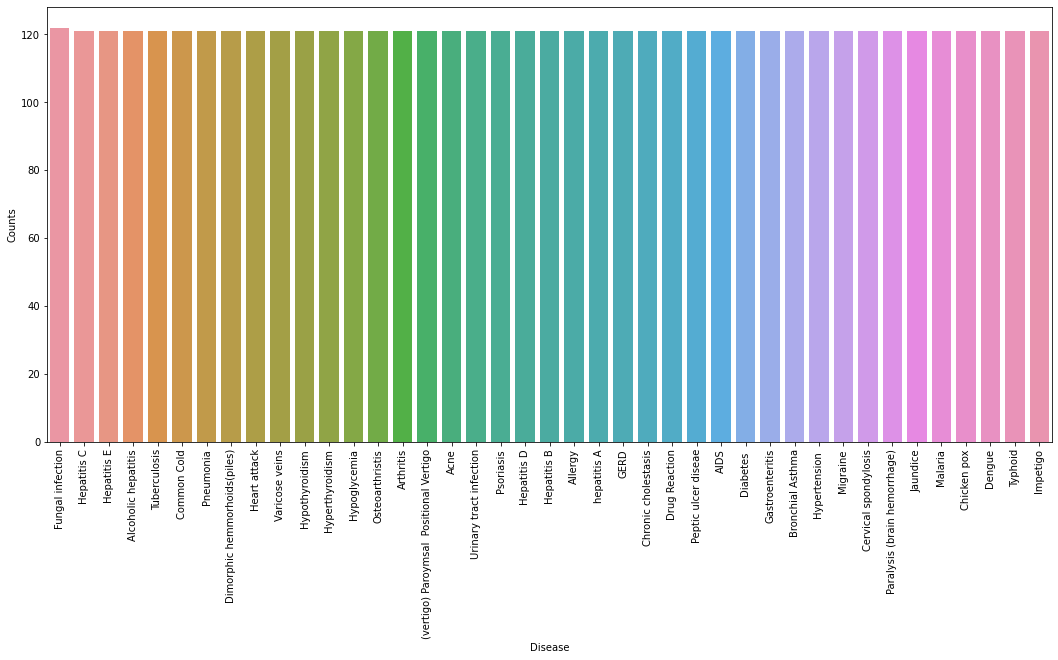

In [102]:
#Evaluation of the balance of classifications in the dataset
disease_counts = comp_data["prognosis"].value_counts()
print(disease_counts)
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})


#code for the dataset 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [103]:
#Code For Support Vector Classifier from sklearn library
linearSVC = svm.LinearSVC()


In [104]:
#80/20 train test split
X = comp_data.drop("prognosis",axis=1)
y = comp_data["prognosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
1457,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1785,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4824,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4797,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
#fitting X_train and y_train to the model and then making predictions from X_test
linearSVC.fit(X_train,y_train)
predictions = linearSVC.predict(X_test)

In [106]:
#classifcation report to see the models performance
cr = classification_report(y_test,predictions)
print(cr)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        25
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        25
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        25
                            Common Cold       1.00      1.00      1.00        24
                           

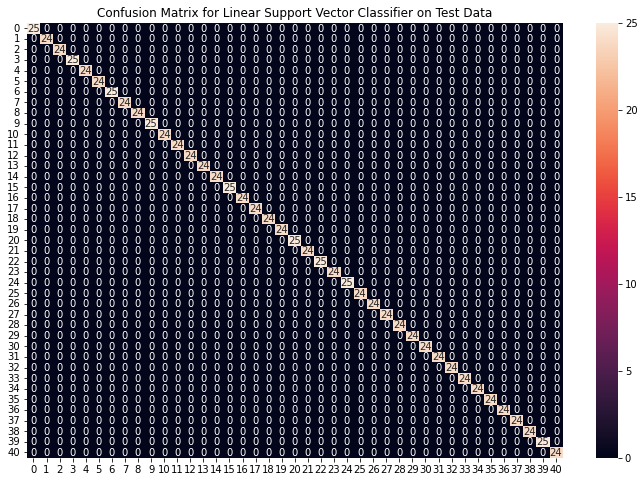

In [107]:

#confusion matrix to analyse the results
cf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Linear Support Vector Classifier on Test Data")
plt.show()

In [108]:
unique = y_train.unique()
new_class = []
for i in range(41):
    new_class.append(i)
comp_data['prognosis'].replace(unique,
                        new_class, inplace=True)
X = comp_data.drop("prognosis",axis=1)
y = comp_data["prognosis"]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
data = array(y_train)
#print(data)
#one hot encode
y_train_onehot = to_categorical(data)
data = array(y_test)
y_test_onehot = to_categorical(data)
print(y_test_onehot)
#print(encoded)
# invert encoding
#inverted = argmax(encoded[0])
#print(inverted)

0       10
1       10
2       10
3       10
4       10
        ..
4957     7
4958     0
4959    29
4960     9
4961    10
Name: prognosis, Length: 4962, dtype: int64
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [109]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(132,activation="relu"))
ann.add(tf.keras.layers.Dense(132,activation="relu"))
ann.add(tf.keras.layers.Dense(units=41,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [110]:
history = ann.fit(X_train,y_train_onehot,batch_size=32,epochs = 50)

Epoch 1/50
125/125 [==============================] - 0s 912us/step - loss: 0.1909 - accuracy: 0.3822
Epoch 2/50
125/125 [==============================] - 0s 831us/step - loss: 0.0335 - accuracy: 0.9907
Epoch 3/50
125/125 [==============================] - 0s 790us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4/50
125/125 [==============================] - 0s 758us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 5/50
125/125 [==============================] - 0s 790us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 6/50
125/125 [==============================] - 0s 774us/step - loss: 6.0523e-04 - accuracy: 1.0000
Epoch 7/50
125/125 [==============================] - 0s 758us/step - loss: 4.0130e-04 - accuracy: 1.0000
Epoch 8/50
125/125 [==============================] - 0s 750us/step - loss: 2.8590e-04 - accuracy: 1.0000
Epoch 9/50
125/125 [==============================] - 0s 782us/step - loss: 2.1284e-04 - accuracy: 1.0000
Epoch 10/50
125/125 [==============================] - 0s 791us/st

In [87]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


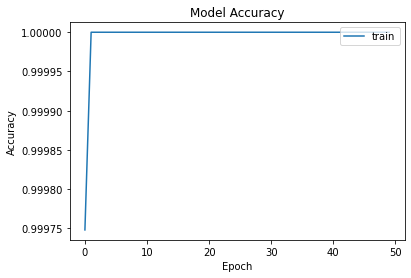

In [94]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

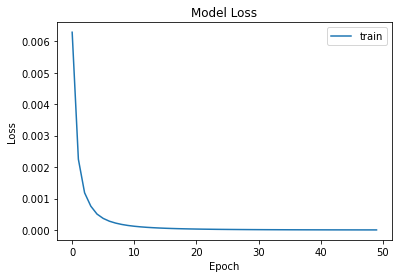

In [95]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

1327    21
3366    13
678     33
948     28
13       3
        ..
1753     2
3222    20
3361    34
2226    15
1818    15
Name: prognosis, Length: 993, dtype: int64


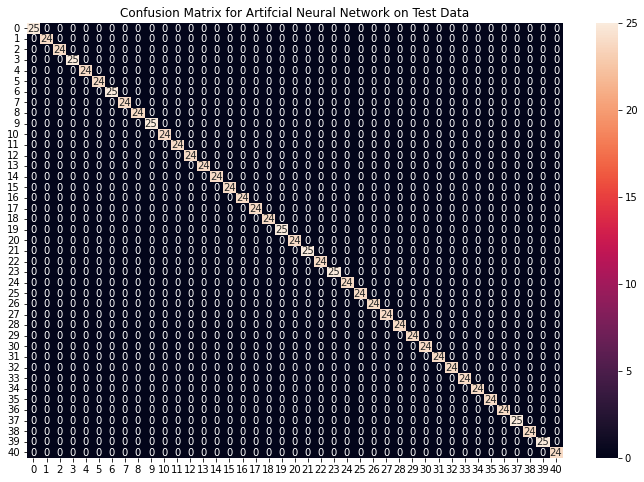

In [62]:
prediction = ann.predict(X_test)
print(y_test)
#confusion matrix to analyse the results
cf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Artifcial Neural Network on Test Data")
plt.show()